# Classification on PlantVillage Dataset 

## importing dependencies

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import torch
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

## Configuring directories

In [2]:
data_dir = "./dataset/complete/"

diseases = os.listdir(data_dir)

# Data Exploration

In [3]:
diseases

diseases.sort()

In [4]:
diseases

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [5]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [6]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [7]:
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [8]:
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


# Composing dataframe

In [9]:
data = []
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for img in os.listdir(class_path):
            img_path = os.path.join(class_path, img)
            data.append({'label': class_name, 'image_path': img_path})

df = pd.DataFrame(data)

In [10]:
df.head()

,label,image_path
0,Raspberry___healthy,./dataset/complete/Raspberry___healthy/9efc34d...
1,Raspberry___healthy,./dataset/complete/Raspberry___healthy/171c4de...
2,Raspberry___healthy,./dataset/complete/Raspberry___healthy/ba2f9f8...
3,Raspberry___healthy,./dataset/complete/Raspberry___healthy/b9d49b1...
4,Raspberry___healthy,./dataset/complete/Raspberry___healthy/1bc672d...


In [11]:
df['label'].value_counts()

Soybean___healthy                                     2527
Apple___Apple_scab                                    2520
Orange___Haunglongbing_(Citrus_greening)              2513
Apple___healthy                                       2510
Pepper,_bell___healthy                                2485
Apple___Black_rot                                     2484
Tomato___Tomato_Yellow_Leaf_Curl_Virus                2451
Potato___Early_blight                                 2424
Potato___Late_blight                                  2424
Tomato___healthy                                      2407
Tomato___Early_blight                                 2400
Grape___Esca_(Black_Measles)                          2400
Pepper,_bell___Bacterial_spot                         2391
Corn_(maize)___Northern_Leaf_Blight                   2385
Corn_(maize)___Common_rust_                           2384
Grape___Black_rot                                     2360
Tomato___Leaf_Mold                                    23

/tmp/ipykernel_70562/1312721563.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate labels to display vertically


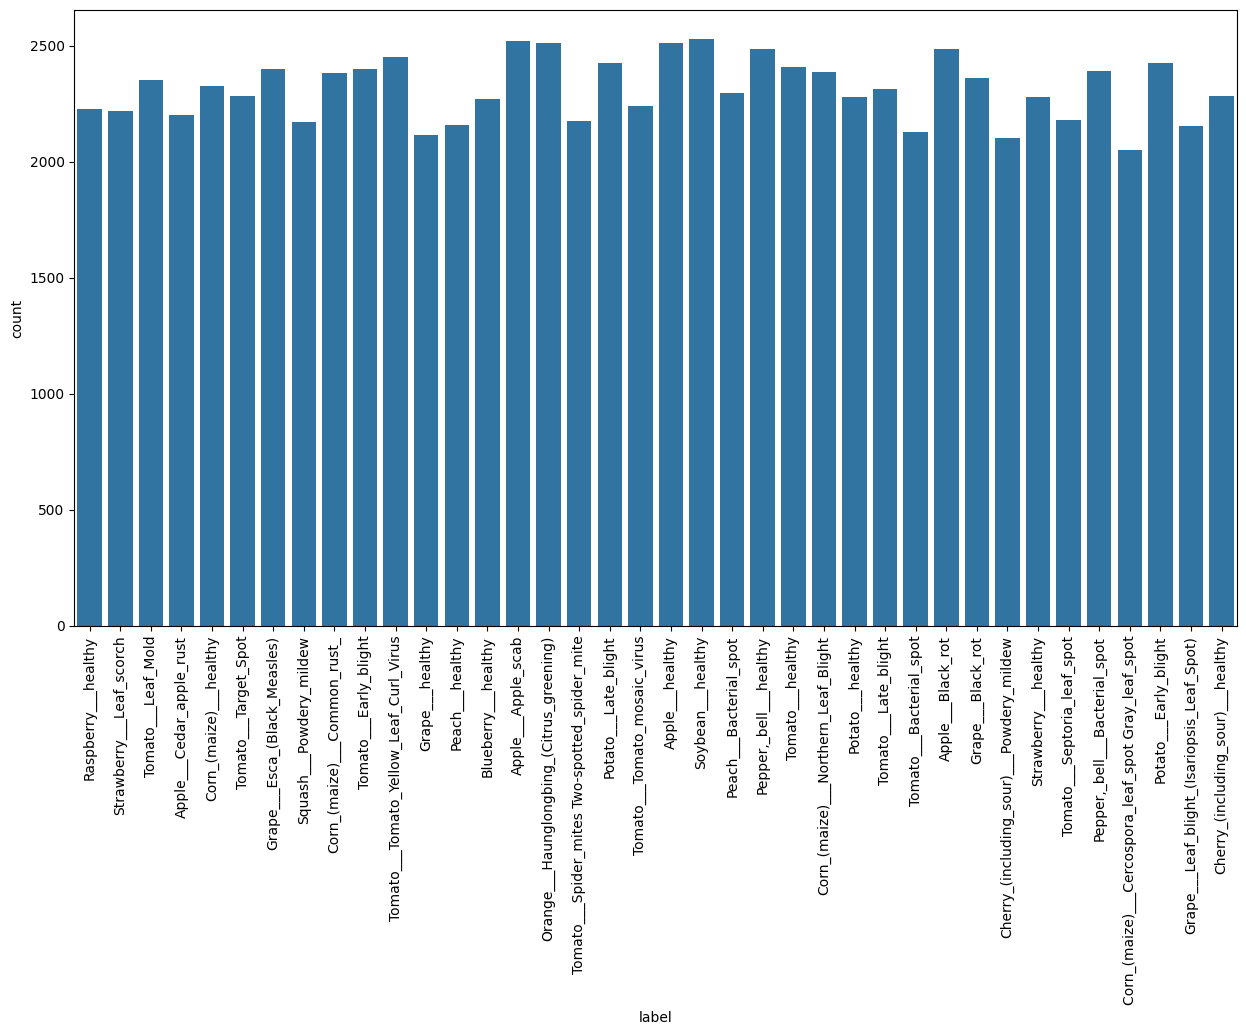

In [12]:
plt.figure(figsize=(15, 8))  # Increased width for a more stretched chart
ax = sns.countplot(x='label', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate labels to display vertically
plt.show()

In [13]:
# Label to index mapping
unique_labels = df['label'].unique()
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# Index to label mapping
index_to_label = {idx: label for label, idx in label_to_index.items()}

# Apply label encoding to your DataFrame
df['encoded_label'] = df['label'].map(label_to_index)

In [14]:
df.head()

,label,image_path,encoded_label
0,Raspberry___healthy,./dataset/complete/Raspberry___healthy/9efc34d...,0
1,Raspberry___healthy,./dataset/complete/Raspberry___healthy/171c4de...,0
2,Raspberry___healthy,./dataset/complete/Raspberry___healthy/ba2f9f8...,0
3,Raspberry___healthy,./dataset/complete/Raspberry___healthy/b9d49b1...,0
4,Raspberry___healthy,./dataset/complete/Raspberry___healthy/1bc672d...,0


# Train, valid, test split

In [15]:
train_temp, test = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train, valid = train_test_split(train_temp, test_size=0.25, stratify=train_temp['label'], random_state=42)

In [16]:
train

,label,image_path,encoded_label
85429,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),./dataset/complete/Grape___Leaf_blight_(Isario...,36
20199,Corn_(maize)___Common_rust_,./dataset/complete/Corn_(maize)___Common_rust_...,8
50537,Peach___Bacterial_spot,./dataset/complete/Peach___Bacterial_spot/da45...,21
28195,Peach___healthy,./dataset/complete/Peach___healthy/0999b486-f3...,12
6736,Tomato___Leaf_Mold,./dataset/complete/Tomato___Leaf_Mold/220cb426...,2
...,...,...,...
57208,Corn_(maize)___Northern_Leaf_Blight,./dataset/complete/Corn_(maize)___Northern_Lea...,24
81978,Potato___Early_blight,./dataset/complete/Potato___Early_blight/68693...,35
76973,"Pepper,_bell___Bacterial_spot","./dataset/complete/Pepper,_bell___Bacterial_sp...",33
36548,Orange___Haunglongbing_(Citrus_greening),./dataset/complete/Orange___Haunglongbing_(Cit...,15


In [17]:
valid

,label,image_path,encoded_label
41819,Tomato___Tomato_mosaic_virus,./dataset/complete/Tomato___Tomato_mosaic_viru...,18
49158,Peach___Bacterial_spot,./dataset/complete/Peach___Bacterial_spot/b03f...,21
49088,Peach___Bacterial_spot,./dataset/complete/Peach___Bacterial_spot/db63...,21
34982,Orange___Haunglongbing_(Citrus_greening),./dataset/complete/Orange___Haunglongbing_(Cit...,15
46186,Apple___healthy,./dataset/complete/Apple___healthy/b0178b88-d4...,19
...,...,...,...
7470,Apple___Cedar_apple_rust,./dataset/complete/Apple___Cedar_apple_rust/5c...,3
52589,"Pepper,_bell___healthy","./dataset/complete/Pepper,_bell___healthy/3ba5...",22
63447,Tomato___Bacterial_spot,./dataset/complete/Tomato___Bacterial_spot/971...,27
76305,Tomato___Septoria_leaf_spot,./dataset/complete/Tomato___Septoria_leaf_spot...,32


In [18]:
test

,label,image_path,encoded_label
28123,Peach___healthy,./dataset/complete/Peach___healthy/3412d130-23...,12
70932,Cherry_(including_sour)___Powdery_mildew,./dataset/complete/Cherry_(including_sour)___P...,30
58702,Potato___healthy,./dataset/complete/Potato___healthy/7e6c8297-d...,25
67516,Apple___Black_rot,./dataset/complete/Apple___Black_rot/8277c9af-...,28
4497,Tomato___Leaf_Mold,./dataset/complete/Tomato___Leaf_Mold/60f7b149...,2
...,...,...,...
63629,Tomato___Bacterial_spot,./dataset/complete/Tomato___Bacterial_spot/a2b...,27
14938,Grape___Esca_(Black_Measles),./dataset/complete/Grape___Esca_(Black_Measles...,6
1496,Raspberry___healthy,./dataset/complete/Raspberry___healthy/b1291c3...,0
37216,Tomato___Spider_mites Two-spotted_spider_mite,./dataset/complete/Tomato___Spider_mites Two-s...,16


# Custom dataset class

In [19]:
class Leaf(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 1]
        image = Image.open(img_path).convert('RGB')
        label = self.dataframe.iloc[idx, 2]
        # label = label_to_index[label]  # Convert label to integer

        if self.transform:
            image = self.transform(image)

        return image, label

In [20]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [21]:
train_dataset = Leaf(train, transform=transform)
valid_dataset = Leaf(valid, transform=transform)
test_dataset = Leaf(test, transform=transform)

In [22]:
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

In [23]:
# show_batch(train_loader) 

## Convert device to cuda, if available

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [25]:
class DeviceDataLoader:
    """Wrap a DataLoader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for batch in self.dataloader:
            yield self._to_device(batch, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)

    @staticmethod
    def _to_device(data, device):
        """Move data to device"""
        if isinstance(data, (list, tuple)):
            return [item.to(device) if isinstance(item, torch.Tensor) else item for item in data]
        return data.to(device)


# CNN

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self, num_classes=38, dropout_rate=0.5):
        super(CNNModel, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # Dropout layer - now using the parameter
        self.dropout = nn.Dropout(dropout_rate)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 32 * 32)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x


## Hyper parameter tuning

In [27]:
hyperparams = {
    'learning_rate': [0.00001, 0.0001, 0.001],
    'dropout_rate': [0.3, 0.5, 0.7],
    'batch_size': [16, 32, 64]
}

In [28]:
import torch.optim as optim

In [29]:
def random_search(learning_rate, dropout_rate, batch_size):
    print(f"****************************************")
    print(f"Random Search: LR: {learning_rate} DR: {dropout_rate} BS: {batch_size}")
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=2, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=2, shuffle=False)

    train_loader = DeviceDataLoader(train_loader, device)
    valid_loader = DeviceDataLoader(valid_loader, device)
    test_loader = DeviceDataLoader(test_loader, device)

    # Instantiate the CNN model
    model = CNNModel(num_classes=38, dropout_rate=dropout_rate)
    model.to(device)  # Move model to the appropriate device

    # Loss Function
    criterion = nn.CrossEntropyLoss()

    # Optimizer (using Adam here)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    num_epochs = 10  # Define the number of epochs

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for batch in train_loader:
            images, labels = batch  # Unpack the batch
            # Ensure images and labels are tensors and correctly retrieved
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Validation step
        model.eval()
        valid_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in valid_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Print statistics
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader)}, Validation Loss: {valid_loss/len(valid_loader)}, Validation Accuracy: {100 * correct / total}%")

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {100 * correct / total}%")




In [30]:
import itertools

In [31]:
for lr, dr, bs in itertools.product(hyperparams['learning_rate'], hyperparams['dropout_rate'], hyperparams['batch_size']):
    random_search(lr, dr, bs)

****************************************
Random Search: LR: 1e-05 DR: 0.3 BS: 16
